<a href="https://colab.research.google.com/github/SandeepMLDLNPL/Machine_Learning_Models/blob/main/Regularized_Model_(Ridge%2CLasso_%26Elastic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(42)

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

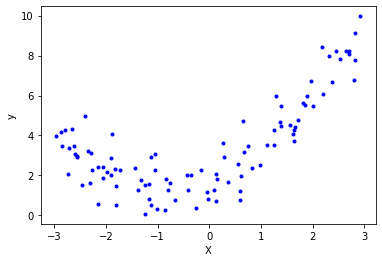

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_feature.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_poly,y)
model.intercept_,model.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

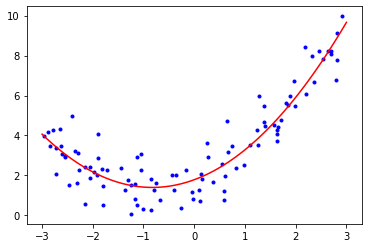

In [7]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_feature.transform(X_new)
y_new = model.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-')
plt.show()

Polynomial Regression of big degree 

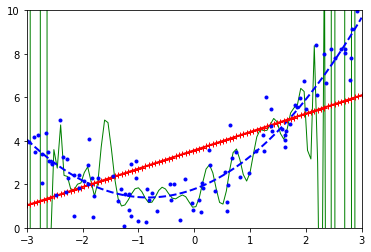

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
for style,width,degree in (('g-',1,300),('b--',2,2),('r-+',2,1)):
  polybig_feature = PolynomialFeatures(degree = degree,include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ('poly_features',polybig_feature),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg),
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,style,label=str(degree),linewidth = width)
plt.plot(X,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

Overfitting Linear Regression

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model,X,y):
  X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 10)
  train_error,val_error = [],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_error.append(mean_squared_error(y_train[:m],y_train_predict))
    val_error.append(mean_squared_error(y_val,y_val_predict))

  plt.plot(np.sqrt(train_error),'r-+',label = 'train')
  plt.plot(np.sqrt(val_error),'b-',label = 'val')
  plt.xlabel("Training set size", fontsize=14) # not shown
  plt.ylabel("RMSE", fontsize=14)    


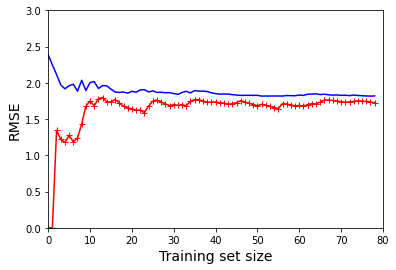

In [10]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

Overfitting Polynomial Regression

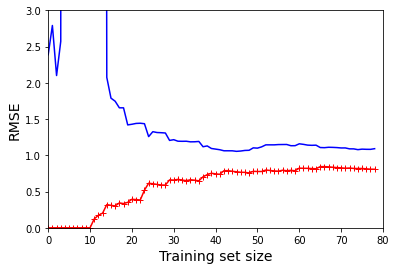

In [11]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 10,include_bias=False)),
    ('lin_reg',LinearRegression()),
])
plot_learning_curve(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

Regularized Models 

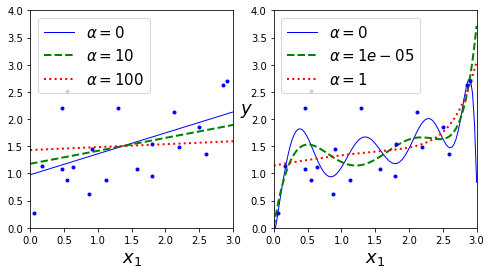

In [14]:
from sklearn.linear_model import Ridge 
np.random.seed(42)

m = 20
X = 3*np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class,polynomial,alphas,**model_kargs):
  for alpha,style in zip(alphas,('b-','g--','r:')):
    model = model_class(alpha,**model_kargs) if alpha > 0 else LinearRegression()
    if polynomial:
      model = Pipeline([
          ('poly_features',PolynomialFeatures(degree = 10,include_bias = False)),
          ('std_scaler',StandardScaler()),
          ('regul_reg',model),
      ])
    model.fit(X,y)
    y_new_regul = model.predict(X_new)
    lw = 2 if alpha > 0 else 1
    plt.plot(X_new,y_new_regul,style,linewidth = lw,label = r"$\alpha = {}$".format(alpha))
  plt.plot(X,y,'b.',linewidth = 3)
  plt.legend(loc="upper left", fontsize=15)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0,3,0,4])

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100),random_state = 42)
plt.subplot(122)
plt.ylabel("$y$", rotation=0, fontsize=18)
plot_model(Ridge,polynomial = True,alphas = (0,10**-5,1),random_state = 42)
plt.show()

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1,solver = 'cholesky',random_state = 42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

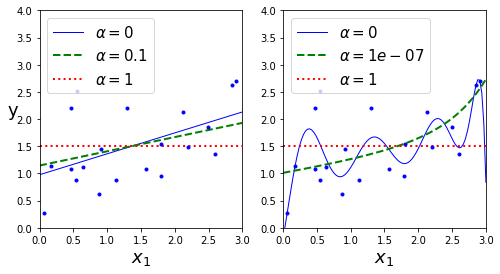

In [20]:
from sklearn.linear_model import Lasso

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Lasso,polynomial = False,alphas = (0,0.1,1),random_state = 42)
plt.ylabel('y',rotation = 0,fontsize = 18)
plt.subplot(122)
plot_model(Lasso,polynomial = True,alphas = (0,10**-7,1),tol = 1,random_state = 42)
plt.show()

In [22]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0.5,random_state= 42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

Early Stopping 

In [23]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

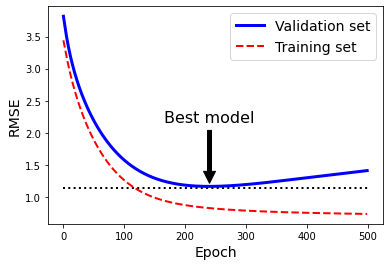

In [34]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor
X_train,X_val,y_train,y_val = train_test_split(X[:50],y[:50].ravel(),test_size = 0.5,random_state = 10)
poly_scaler = Pipeline([
    ('poly_feature',PolynomialFeatures(degree = 90,include_bias = False)),
    ('std_scaler',StandardScaler())
])
X_train_scaled = poly_scaler.fit_transform(X_train)
X_val_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter = 1,eta0 = 0.0005,
    warm_start = True,
    learning_rate = 'constant',
    random_state = 42
)
n_epochs = 500
train_errors,val_errors = [],[]
for epoch in range(n_epochs):
  sgd_reg.fit(X_train_scaled,y_train)
  y_train_predict = sgd_reg.predict(X_train_scaled)
  y_val_predict= sgd_reg.predict(X_val_scaled)
  train_errors.append(mean_squared_error(y_train,y_train_predict))
  val_errors.append(mean_squared_error(y_val,y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [40]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1,  warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [41]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))